In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp"  # Replace with your actual file path
gdf = gpd.read_file(shapefile_path)

# Check the first few rows
print(gdf.head())


                  UNIQUE_ID COUNTYFP         GEOID CountyName  \
0  001-:-Albany Ward 1 ED 1      001  360010101001     Albany   
1  001-:-Albany Ward 1 ED 2      001  360010101002     Albany   
2  001-:-Albany Ward 1 ED 3      001  360010101003     Albany   
3  001-:-Albany Ward 1 ED 4      001  360010101004     Albany   
4  001-:-Albany Ward 1 ED 5      001  360010101005     Albany   

               EDName   EDID MuniName  MuniID CONG_DIST SLDL_DIST  ...  \
0  Albany Ward 1 ED 1  01001   Albany       1        20       109  ...   
1  Albany Ward 1 ED 2  01002   Albany       1        20       109  ...   
2  Albany Ward 1 ED 3  01003   Albany       1        20       109  ...   
3  Albany Ward 1 ED 4  01004   Albany       1        20       109  ...   
4  Albany Ward 1 ED 5  01005   Albany       1        20       109  ...   

  GSU60RGAL  GSU61DRYA  GSU61OWRI  GSU61RRAT  GSU62OWRI  GSU62RORT  GSU63CPIE  \
0         0          0          0          0          0          0          0   
1 

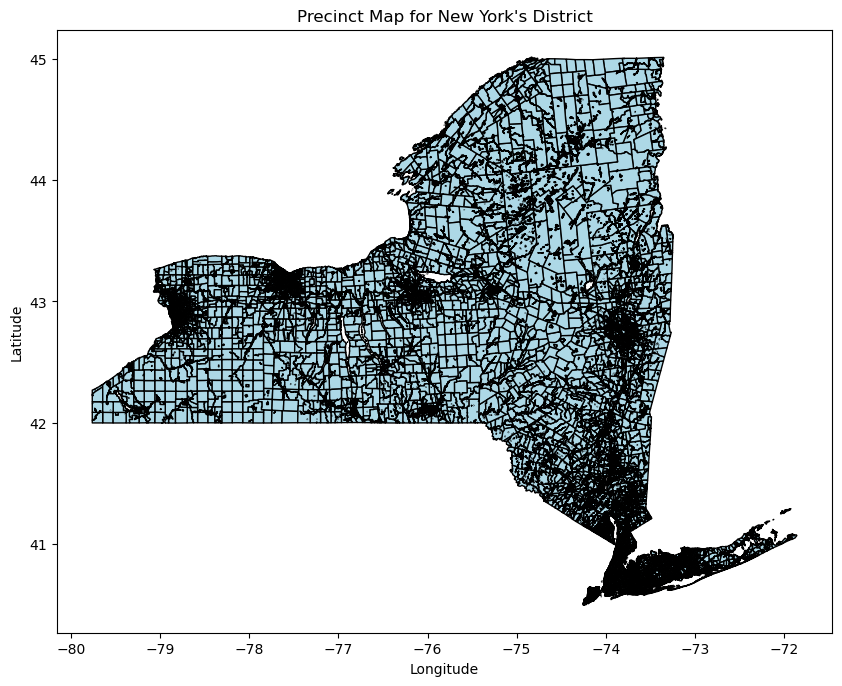

In [2]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame
gdf.plot(ax=ax, color="lightblue", edgecolor="black")

# Add titles and labels
ax.set_title("Precinct Map for New York's District")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load precinct shapefile
precincts_gdf = gpd.read_file("ny_vest_16/ny_vest_16.shp")

# Plot the shapefile to visualize precinct boundaries
fig, ax = plt.subplots(figsize=(10, 10))
precincts_gdf.plot(ax=ax, color="lightblue", edgecolor="black")

# Add labels
ax.set_title("Precinct Map for New York")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [9]:
print(ny_precincts.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'GEOID', 'CountyName', 'EDName', 'EDID',
       'MuniName', 'MuniID', 'CONG_DIST', 'SLDL_DIST',
       ...
       'GSU60RGAL', 'GSU61DRYA', 'GSU61OWRI', 'GSU61RRAT', 'GSU62OWRI',
       'GSU62RORT', 'GSU63CPIE', 'GSU63DKEN', 'GSU63OWRI', 'geometry'],
      dtype='object', length=692)


In [8]:
print(ny_parties.columns)

Index(['UNIQUE_ID', 'COUNTYFP', 'GEOID', 'CountyName', 'EDName', 'EDID',
       'MuniName', 'MuniID', 'CONG_DIST', 'SLDL_DIST',
       ...
       'GSU61RRAT', 'GSU61WRYA', 'GSU62CORT', 'GSU62OWRI', 'GSU62RORT',
       'GSU63CPIE', 'GSU63DKEN', 'GSU63OWRI', 'GSU63WKEN', 'geometry'],
      dtype='object', length=984)


In [ ]:
print(ny_parties.columns[:30])


Index(['UNIQUE_ID', 'COUNTYFP', 'GEOID', 'CountyName', 'EDName', 'EDID',
       'MuniName', 'MuniID', 'CONG_DIST', 'SLDL_DIST', 'SLDU_DIST',
       'G22ATGCHEN', 'G22ATGDJAM', 'G22ATGOWRI', 'G22ATGRHEN', 'G22ATGWJAM',
       'G22COMCROD', 'G22COMDDIN', 'G22COMOWRI', 'G22COMRROD', 'G22COMWDIN',
       'G22GOVCZEL', 'G22GOVDHOC', 'G22GOVOWRI', 'G22GOVRZEL', 'G22GOVWHOC',
       'G22USSCPIN', 'G22USSDSCH', 'G22USSLSAR', 'G22USSOWRI'],
      dtype='object')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6224\288661793.py:27: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_data.plot(column='color', color=merged_data['color'], linewidth=0.8, ax=ax, edgecolor='0.8')


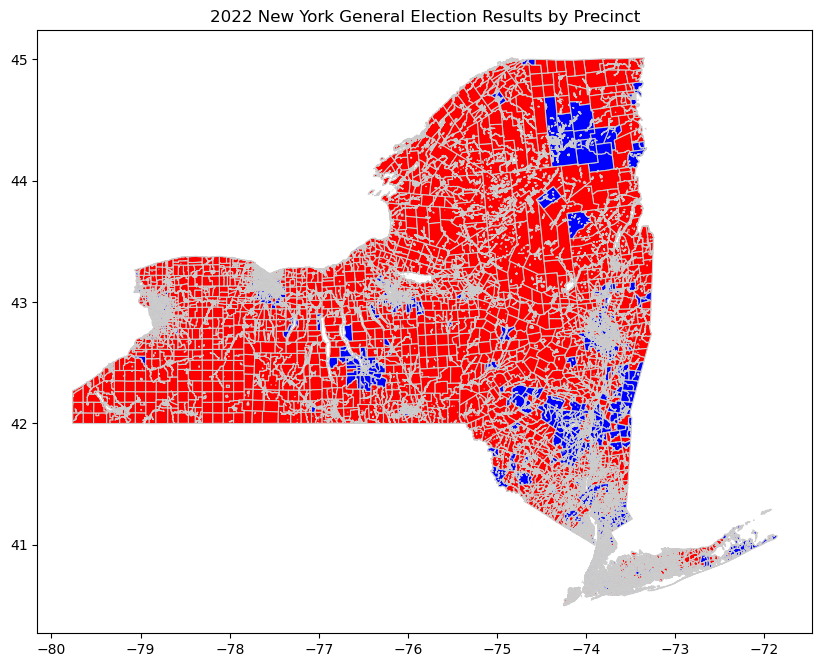

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefiles for precincts and parties
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")
ny_parties = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec_PARTIES/ny_2022_gen_prec_PARTIES.shp")

# Determine the winner for each precinct based on maximum votes among relevant columns
ny_parties['Winner_Party'] = ny_parties[['G22ATGDJAM', 'G22ATGRHEN', 'G22GOVDHOC', 'G22GOVRZEL']].idxmax(axis=1)

# Create a mapping for color based on the winning party column
party_colors = {
    'G22ATGDJAM': 'blue',  # Democratic - Letitia James (AG)
    'G22ATGRHEN': 'red',   # Republican - Michael Henry (AG)
    'G22GOVDHOC': 'blue',  # Democratic - Kathy Hochul (Governor)
    'G22GOVRZEL': 'red'    # Republican - Lee Zeldin (Governor)
}

# Map colors to the Winner_Party column
ny_parties['color'] = ny_parties['Winner_Party'].map(party_colors)

# Merge precinct shapes with the party data
merged_data = ny_precincts.merge(ny_parties[['UNIQUE_ID', 'Winner_Party', 'color']], on='UNIQUE_ID', how='left')

# Plot the map with precincts colored by winning party
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='color', color=merged_data['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("2022 New York General Election Results by Precinct")
plt.show()


C:\Users\varma\AppData\Local\Temp\ipykernel_30068\2476410960.py:30: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_data.plot(column='color', color=merged_data['color'], linewidth=0.5, ax=ax, edgecolor='0.5')


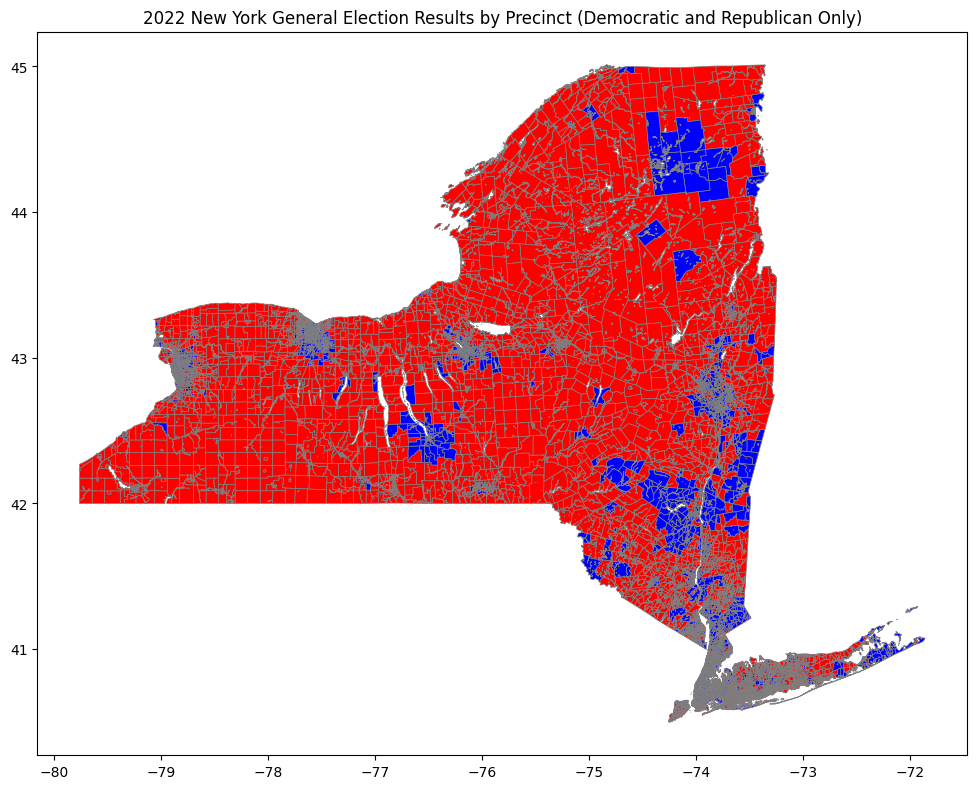

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefiles for precincts and party results
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")
ny_parties = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec_PARTIES/ny_2022_gen_prec_PARTIES.shp")

# Identify the winning party based on the maximum votes among the selected columns
ny_parties['Winner_Party'] = ny_parties[['G22ATGDJAM', 'G22ATGRHEN', 'G22GOVDHOC', 'G22GOVRZEL']].idxmax(axis=1)

# Filter to retain only Democratic and Republican winners
ny_parties = ny_parties[ny_parties['Winner_Party'].isin(['G22ATGDJAM', 'G22ATGRHEN', 'G22GOVDHOC', 'G22GOVRZEL'])]

# Define colors for Democratic and Republican wins
party_colors = {
    'G22ATGDJAM': 'blue',  # Democratic - Letitia James (AG)
    'G22ATGRHEN': 'red',   # Republican - Michael Henry (AG)
    'G22GOVDHOC': 'blue',  # Democratic - Kathy Hochul (Governor)
    'G22GOVRZEL': 'red'    # Republican - Lee Zeldin (Governor)
}

# Map colors to the Winner_Party column
ny_parties['color'] = ny_parties['Winner_Party'].map(party_colors)

# Merge precinct data with party results
merged_data = ny_precincts.merge(ny_parties[['UNIQUE_ID', 'Winner_Party', 'color']], on='UNIQUE_ID', how='left')

# Plot the map with colored precincts
fig, ax = plt.subplots(figsize=(12, 12))
merged_data.plot(column='color', color=merged_data['color'], linewidth=0.5, ax=ax, edgecolor='0.5')

plt.title("2022 New York General Election Results by Precinct (Democratic and Republican Only)")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# Load the shapefile for precincts
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter for Bronx precincts using the CountyName or COUNTYFP field
bronx_precincts = ny_precincts[ny_precincts['CountyName'] == 'Bronx'].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Calculate bounding boxes and store them in a new column
bronx_precincts['bbox'] = bronx_precincts.geometry.apply(lambda x: box(*x.bounds))


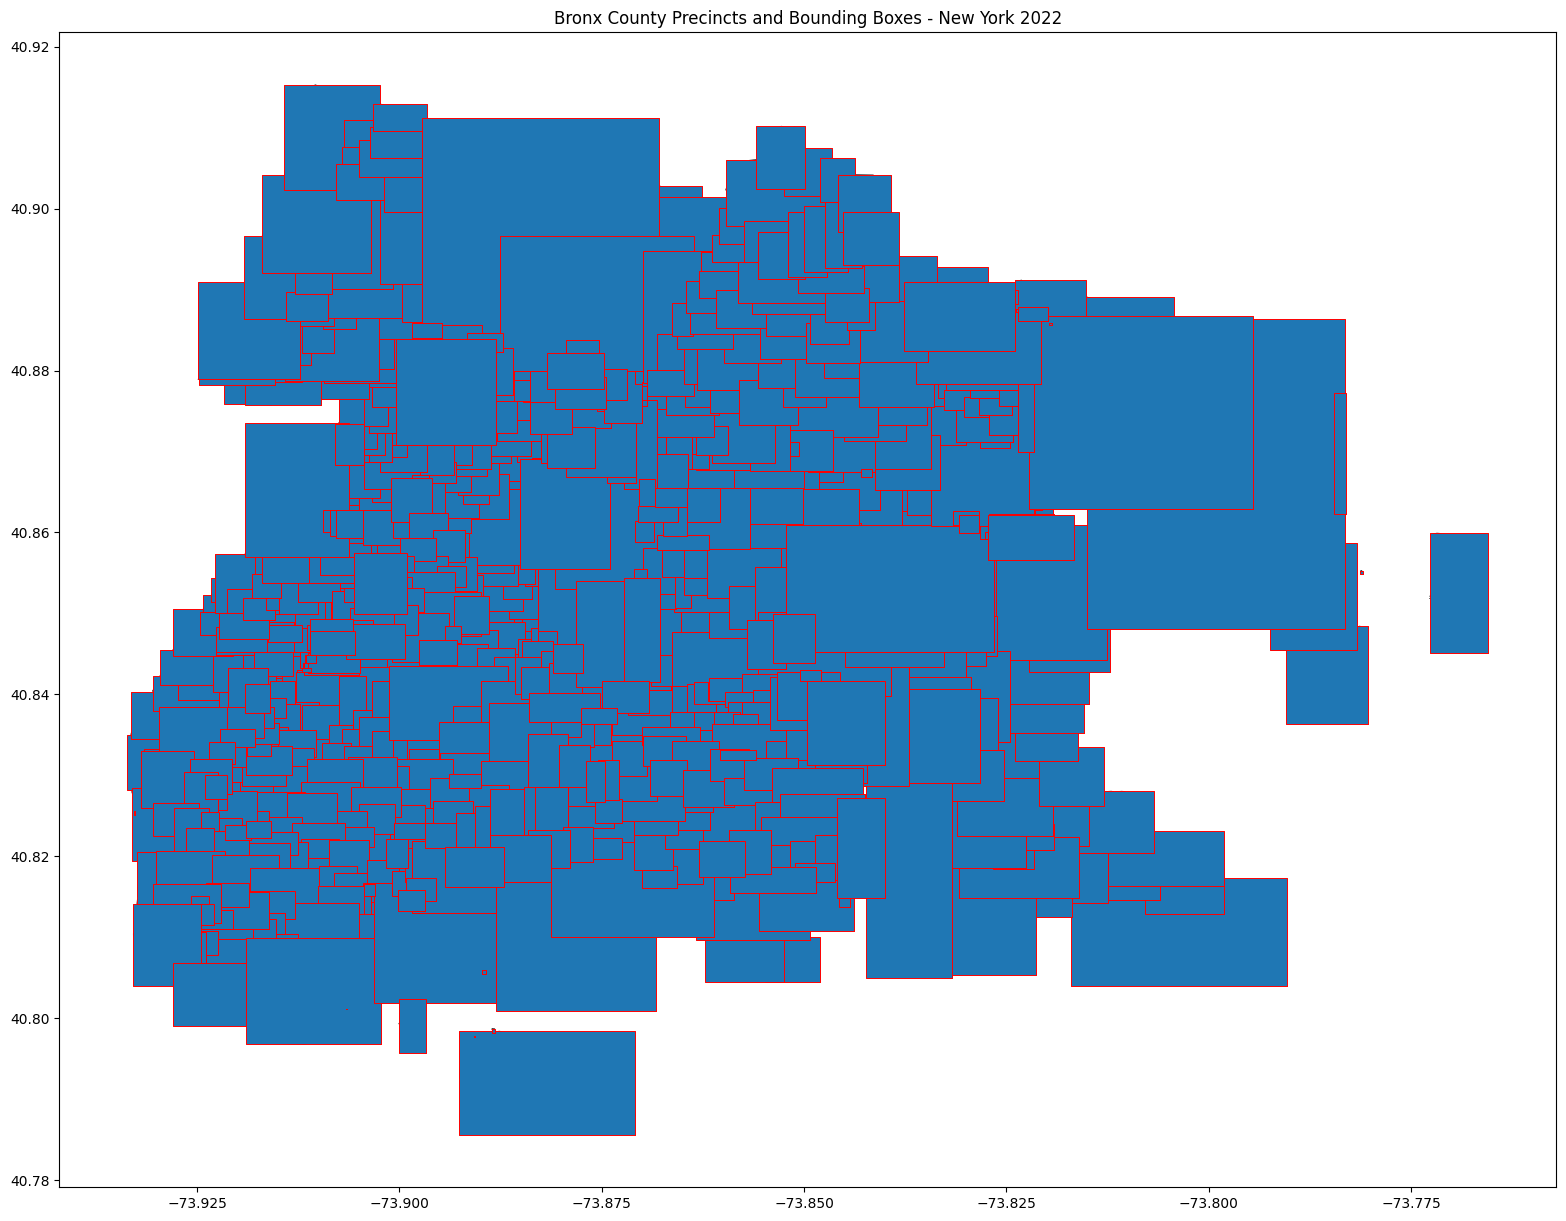

In [ ]:
# Plot precincts in the Bronx
fig, ax = plt.subplots(figsize=(20, 15))
bronx_precincts.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.5)

# Add bounding boxes to the plot
for _, row in bronx_precincts.iterrows():
    row_bbox = gpd.GeoSeries(row['bbox'])
    row_bbox.plot(ax=ax, edgecolor='red', linewidth=0.7)

plt.title("Bronx County Precincts and Bounding Boxes - New York 2022")
plt.show()

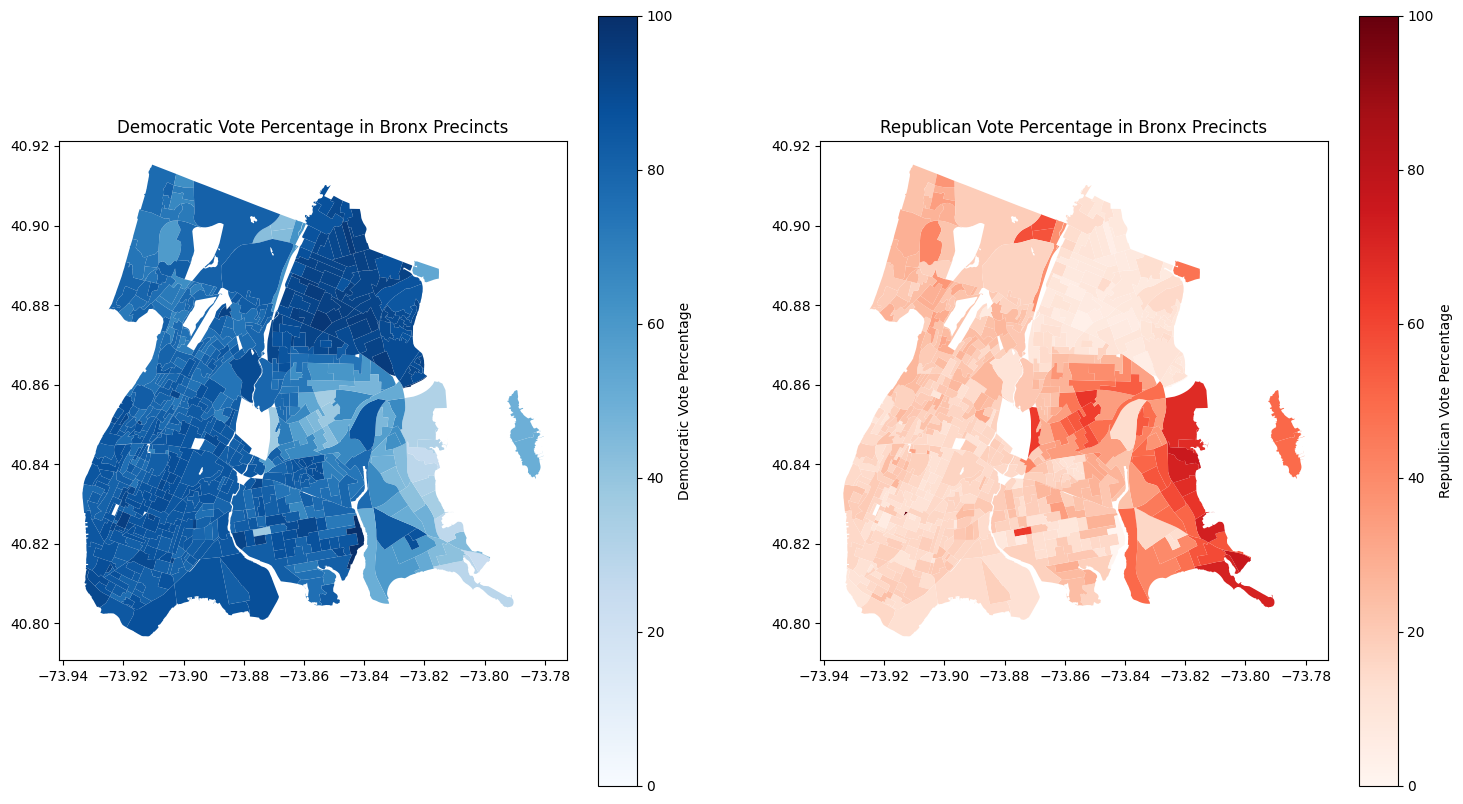

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load precinct shapefile and data
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter precincts for Bronx County
bronx_precincts = ny_precincts[ny_precincts['CountyName'] == 'Bronx'].copy()

# Assuming vote columns for Democratic and Republican parties for each precinct exist
# Replace these with the actual column names in your dataset, e.g., 'G22GOVDHOC' for Democratic governor and 'G22GOVRZEL' for Republican governor votes
dem_vote_columns = ['G22ATGDJAM', 'G22GOVDHOC']  # Example Democratic columns
rep_vote_columns = ['G22ATGRHEN', 'G22GOVRZEL']  # Example Republican columns

# Calculate total votes for each precinct, summing Democratic and Republican votes
bronx_precincts['TotalVotes'] = bronx_precincts[dem_vote_columns + rep_vote_columns].sum(axis=1)

# Calculate Democratic and Republican vote percentages
bronx_precincts['Dem_Percentage'] = bronx_precincts[dem_vote_columns].sum(axis=1) / bronx_precincts['TotalVotes'] * 100
bronx_precincts['Rep_Percentage'] = bronx_precincts[rep_vote_columns].sum(axis=1) / bronx_precincts['TotalVotes'] * 100

# Plot Democratic vote percentage
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

bronx_precincts.plot(column='Dem_Percentage', cmap='Blues', legend=True, ax=ax[0],
                     legend_kwds={'label': "Democratic Vote Percentage"})
ax[0].set_title("Democratic Vote Percentage in Bronx Precincts")

# Plot Republican vote percentage
bronx_precincts.plot(column='Rep_Percentage', cmap='Reds', legend=True, ax=ax[1],
                     legend_kwds={'label': "Republican Vote Percentage"})
ax[1].set_title("Republican Vote Percentage in Bronx Precincts")

plt.show()


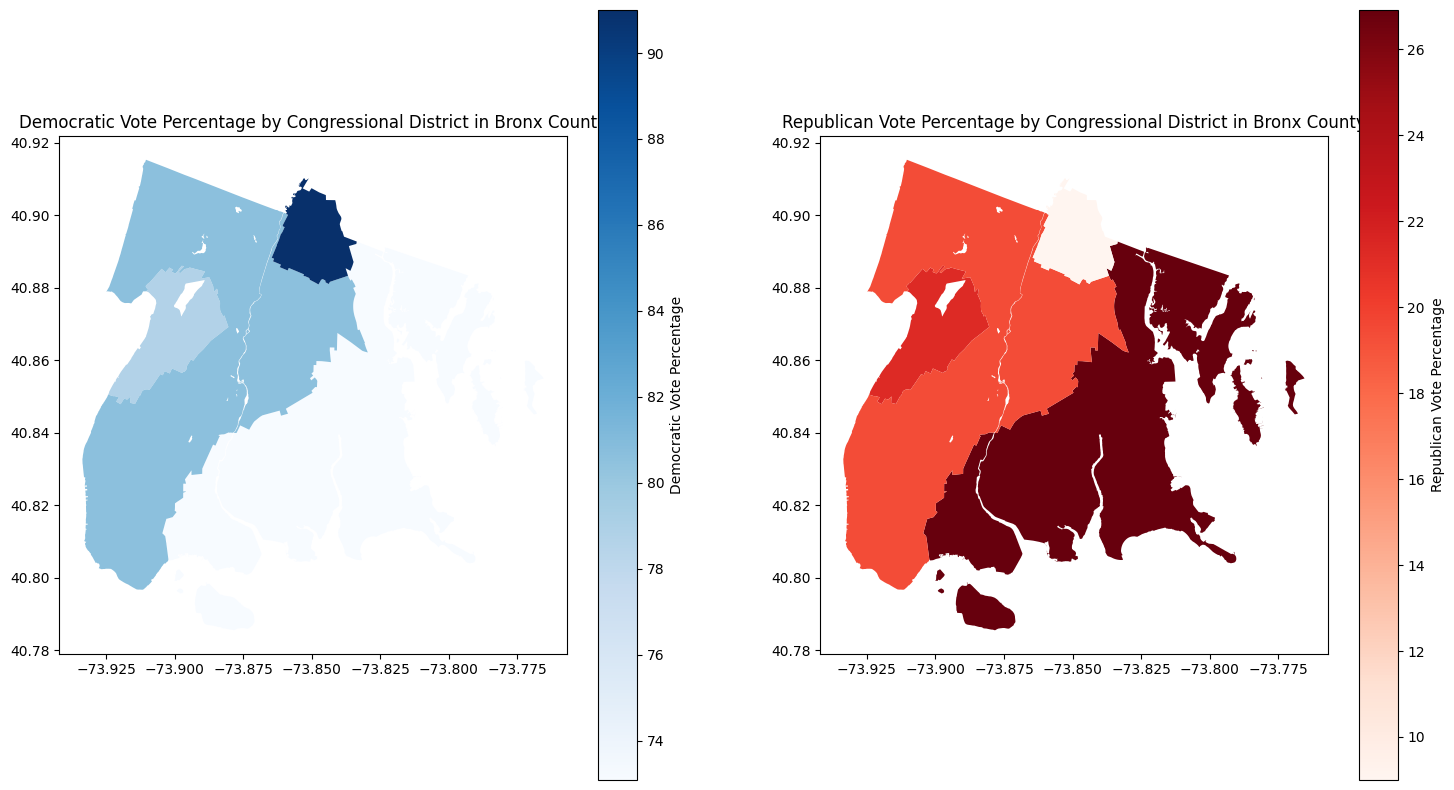

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the precinct data
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter for Bronx County precincts
bronx_precincts = ny_precincts[ny_precincts['CountyName'] == 'Bronx'].copy()

# Group by congressional district
district_vote_data = bronx_precincts.dissolve(by='CONG_DIST', aggfunc='sum')

# Define Democratic and Republican vote columns
dem_vote_columns = ['G22ATGDJAM', 'G22GOVDHOC']  # Adjust as needed based on available Democratic columns
rep_vote_columns = ['G22ATGRHEN', 'G22GOVRZEL']  # Adjust as needed based on available Republican columns

# Calculate total votes for each district
district_vote_data['TotalVotes'] = district_vote_data[dem_vote_columns + rep_vote_columns].sum(axis=1)

# Calculate vote percentages
district_vote_data['Dem_Percentage'] = district_vote_data[dem_vote_columns].sum(axis=1) / district_vote_data['TotalVotes'] * 100
district_vote_data['Rep_Percentage'] = district_vote_data[rep_vote_columns].sum(axis=1) / district_vote_data['TotalVotes'] * 100

# Plot Democratic and Republican percentages by district
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Plot Democratic vote percentage
district_vote_data.plot(column='Dem_Percentage', cmap='Blues', legend=True, ax=ax[0],
                        legend_kwds={'label': "Democratic Vote Percentage"})
ax[0].set_title("Democratic Vote Percentage by Congressional District in Bronx County")

# Plot Republican vote percentage
district_vote_data.plot(column='Rep_Percentage', cmap='Reds', legend=True, ax=ax[1],
                        legend_kwds={'label': "Republican Vote Percentage"})
ax[1].set_title("Republican Vote Percentage by Congressional District in Bronx County")

plt.show()


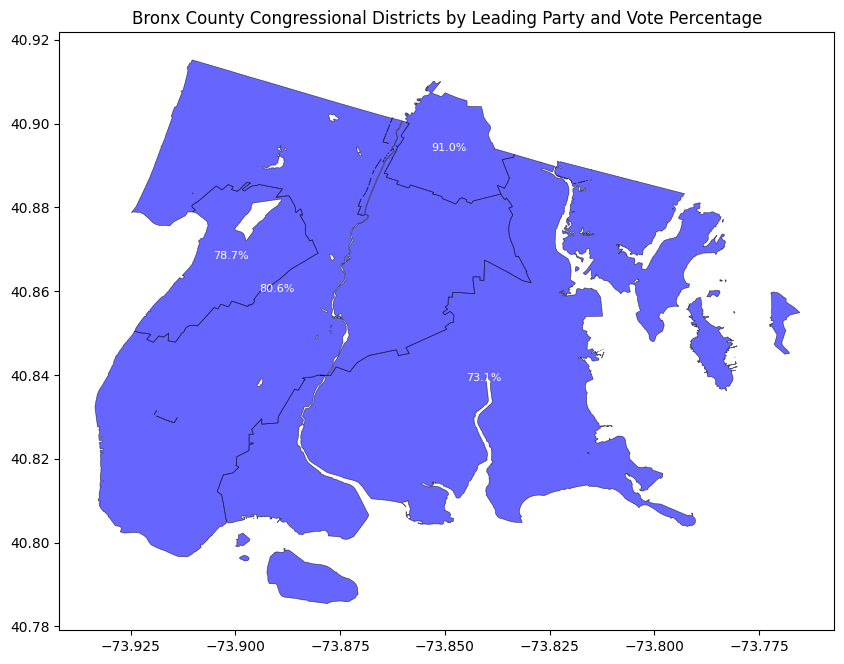

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the precinct data
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter for Bronx County precincts
bronx_precincts = ny_precincts[ny_precincts['CountyName'] == 'Bronx'].copy()

# Group by congressional district
district_vote_data = bronx_precincts.dissolve(by='CONG_DIST', aggfunc='sum')

# Define Democratic and Republican vote columns
dem_vote_columns = ['G22ATGDJAM', 'G22GOVDHOC']  # Adjust as needed based on available Democratic columns
rep_vote_columns = ['G22ATGRHEN', 'G22GOVRZEL']  # Adjust as needed based on available Republican columns

# Calculate total votes for each district
district_vote_data['TotalVotes'] = district_vote_data[dem_vote_columns + rep_vote_columns].sum(axis=1)

# Calculate vote percentages
district_vote_data['Dem_Percentage'] = district_vote_data[dem_vote_columns].sum(axis=1) / district_vote_data['TotalVotes'] * 100
district_vote_data['Rep_Percentage'] = district_vote_data[rep_vote_columns].sum(axis=1) / district_vote_data['TotalVotes'] * 100

# Determine the dominant party and color
district_vote_data['Color'] = district_vote_data.apply(
    lambda x: 'blue' if x['Dem_Percentage'] > x['Rep_Percentage'] else 'red', axis=1
)

# Plot each district with the dominant party color and vote percentage label
fig, ax = plt.subplots(figsize=(10, 10))
for _, row in district_vote_data.iterrows():
    district = row['geometry']
    color = row['Color']
    label = f"{row['Dem_Percentage']:.1f}%" if color == 'blue' else f"{row['Rep_Percentage']:.1f}%"
    
    # Plot the district geometry with color
    if district.geom_type == 'MultiPolygon':
        for poly in district.geoms:  # Access each polygon in the MultiPolygon
            gpd.GeoSeries([poly]).plot(ax=ax, color=color, alpha=0.6, edgecolor='black', linewidth=0.5)
    else:
        gpd.GeoSeries([district]).plot(ax=ax, color=color, alpha=0.6, edgecolor='black', linewidth=0.5)

    # Add label at centroid
    centroid = district.centroid
    ax.text(centroid.x, centroid.y, label, ha='center', fontsize=8, color='white')

ax.set_title("Bronx County Congressional Districts by Leading Party and Vote Percentage")
plt.show()


In [ ]:
import geopandas as gpd

# Load the precinct data (replace with your file path)
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Display the column names
print(ny_precincts.columns)


Index(['UNIQUE_ID', 'COUNTYFP', 'GEOID', 'CountyName', 'EDName', 'EDID',
       'MuniName', 'MuniID', 'CONG_DIST', 'SLDL_DIST',
       ...
       'GSU60RGAL', 'GSU61DRYA', 'GSU61OWRI', 'GSU61RRAT', 'GSU62OWRI',
       'GSU62RORT', 'GSU63CPIE', 'GSU63DKEN', 'GSU63OWRI', 'geometry'],
      dtype='object', length=692)


In [ ]:
import geopandas as gpd

# Load the precinct data (replace with your file path)
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Display unique values from the CONG_DIST column
print(ny_precincts['CONG_DIST'].unique())


['20' '23' '15' '13' '14' '16' '19' '24' '21' '18' '17' '26' '09' '08'
 '10' '07' '11' '22' '25' '03' '02' '04' '12' '05' '06' '01']


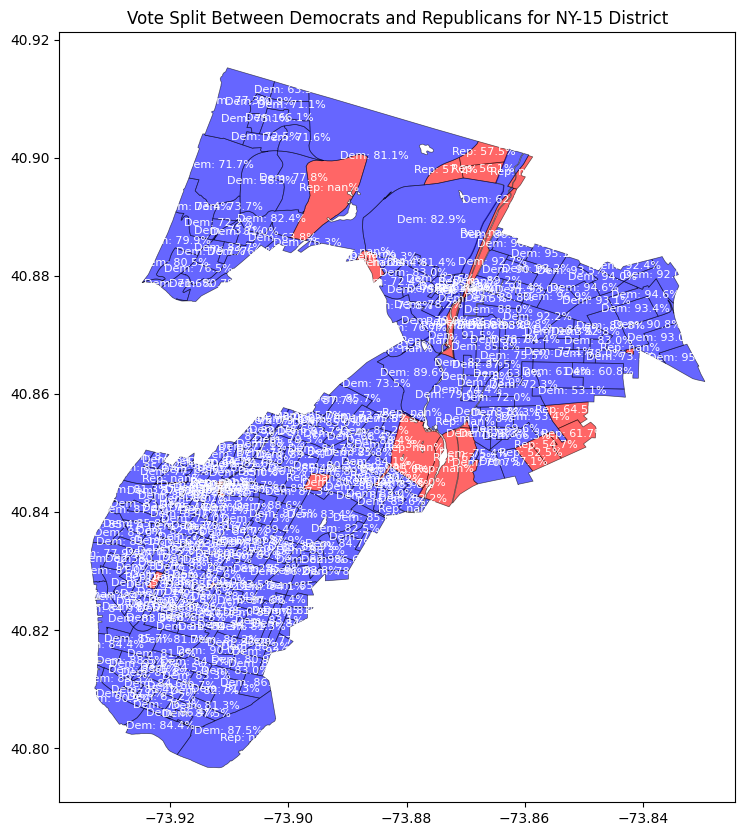

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the precinct data
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter for Bronx County precincts and NY-15 district (confirming column name for district)
bronx_precincts = ny_precincts[(ny_precincts['CountyName'] == 'Bronx') & (ny_precincts['CONG_DIST'] == '15')].copy()

# Check if any precincts were returned
if bronx_precincts.empty:
    print("No precincts found for NY-15 in Bronx County.")
else:
    # Define Democratic and Republican vote columns
    dem_vote_columns = ['G22ATGDJAM', 'G22GOVDHOC']  # Democratic vote columns
    rep_vote_columns = ['G22ATGRHEN', 'G22GOVRZEL']  # Republican vote columns

    # Calculate total votes and percentages for NY-15
    bronx_precincts['TotalVotes'] = bronx_precincts[dem_vote_columns + rep_vote_columns].sum(axis=1)
    bronx_precincts['Dem_Percentage'] = bronx_precincts[dem_vote_columns].sum(axis=1) / bronx_precincts['TotalVotes'] * 100
    bronx_precincts['Rep_Percentage'] = bronx_precincts[rep_vote_columns].sum(axis=1) / bronx_precincts['TotalVotes'] * 100

    # Plot the vote split for NY-15 district
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot Democratic vs Republican areas within NY-15
    for _, row in bronx_precincts.iterrows():
        district = row['geometry']
        dem_label = f"Dem: {row['Dem_Percentage']:.1f}%"
        rep_label = f"Rep: {row['Rep_Percentage']:.1f}%"
        
        # Plot precincts
        if row['Dem_Percentage'] > row['Rep_Percentage']:
            color = 'blue'
            label = dem_label
        else:
            color = 'red'
            label = rep_label

        # Ensure district geometry is plotted
        gpd.GeoSeries([district]).plot(ax=ax, color=color, alpha=0.6, edgecolor='black', linewidth=0.5)
        
        # Place labels at the precinct centroid
        if district.centroid.is_empty:
            continue  # Skip if centroid is empty
        centroid = district.centroid
        ax.text(centroid.x, centroid.y, label, ha='center', fontsize=8, color='white')

    ax.set_title("Vote Split Between Democrats and Republicans for NY-15 District")
    plt.show()


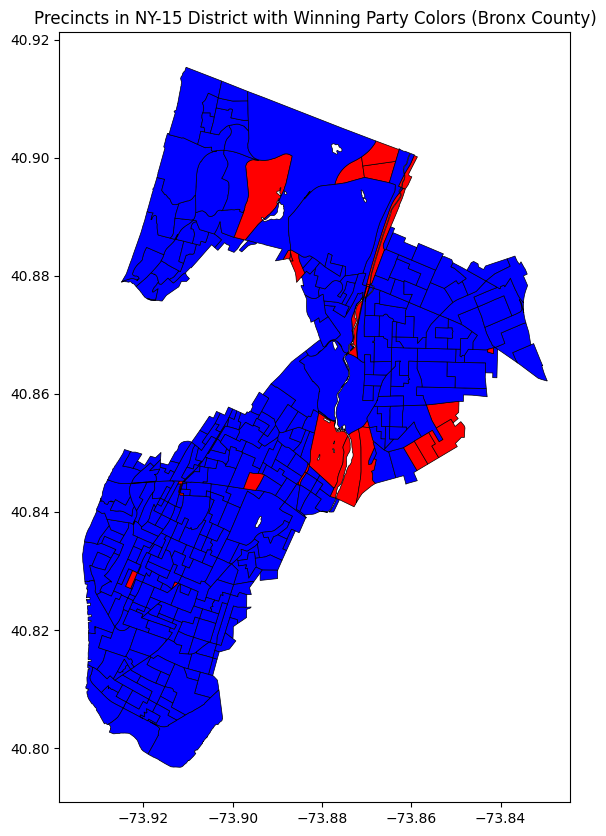

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the precinct data
ny_precincts = gpd.read_file("ny_2022_gen_prec/ny_2022_gen_prec/ny_2022_gen_prec.shp")

# Filter for Bronx County precincts and NY-15 district
bronx_precincts = ny_precincts[(ny_precincts['CountyName'] == 'Bronx') & (ny_precincts['CONG_DIST'] == '15')].copy()

# Check if any precincts were returned
if bronx_precincts.empty:
    print("No precincts found for NY-15 in Bronx County.")
else:
    # Define Democratic and Republican vote columns
    dem_vote_columns = ['G22ATGDJAM', 'G22GOVDHOC']  # Democratic vote columns
    rep_vote_columns = ['G22ATGRHEN', 'G22GOVRZEL']  # Republican vote columns

    # Calculate total votes for each party in each precinct
    bronx_precincts['Dem_Votes'] = bronx_precincts[dem_vote_columns].sum(axis=1)
    bronx_precincts['Rep_Votes'] = bronx_precincts[rep_vote_columns].sum(axis=1)

    # Determine the winning party for each precinct
    bronx_precincts['Winning_Party'] = bronx_precincts.apply(lambda row: 'blue' if row['Dem_Votes'] > row['Rep_Votes'] else 'red', axis=1)

    # Plot each precinct with color indicating the winning party
    fig, ax = plt.subplots(figsize=(10, 10))
    bronx_precincts.plot(ax=ax, color=bronx_precincts['Winning_Party'], edgecolor='black', linewidth=0.5)

    ax.set_title("Precincts in NY-15 District with Winning Party Colors (Bronx County)")
    plt.show()
